<a href="https://colab.research.google.com/github/Uthmanic/HAMOYE-DataScience-Internship/blob/Stage-E/Stage_E(Practical_Time_Series_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# import necessary libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [3]:
power = pd.read_csv('drive/My Drive/household_power_consumption.csv', low_memory=False,
                    infer_datetime_format=True, parse_dates={"Datetime":['Date','Time']},index_col=["Datetime"])
power_data = power.copy()
power_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
power_data.replace({'?': np.nan},inplace=True)    #changing missing values with '?' to the NaN
power_data.isnull().sum()    #check NaN missing values

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [5]:
# change columns with 'object' dtype to float
for column in power_data.select_dtypes(include=['object']).columns:
  if column != 'Time':
    power_data[[column]] = power_data[[column]].astype('float')

power_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [6]:
#Filling missing data with respective column mean
power_data = power_data.fillna(power_data.mean())
power_data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [7]:
#downsample data to daily data points
power_daily = power_data.resample('D').sum()
power_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2006-12-16 to 2010-11-26
Freq: D
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    1442 non-null   float64
 1   Global_reactive_power  1442 non-null   float64
 2   Voltage                1442 non-null   float64
 3   Global_intensity       1442 non-null   float64
 4   Sub_metering_1         1442 non-null   float64
 5   Sub_metering_2         1442 non-null   float64
 6   Sub_metering_3         1442 non-null   float64
dtypes: float64(7)
memory usage: 90.1 KB


**Question 11**

Text(0, 0.5, 'G_A_P')

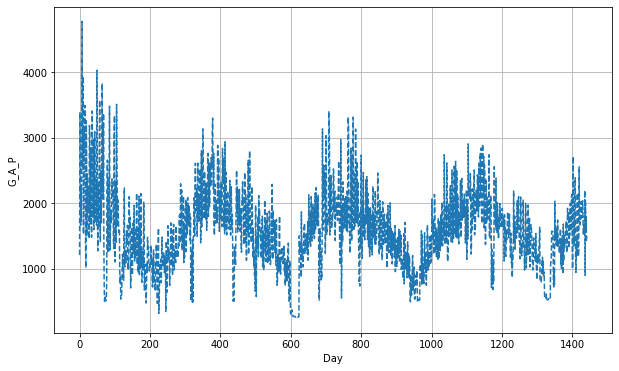

In [29]:
#plot of the daily global_active_power over time
plt.figure(figsize=(10,6))
plt.plot(power_daily.index, power_daily.Global_active_power, '--')
plt.grid()
plt.xlabel('Day')
plt.ylabel('G_A_P')

**Question 12** - Pearsons correlation between global active and reactive power

In [8]:
#Pearsons correlation between global active and reactive power
print(round(power_daily['Global_active_power'].corr(power_daily['Global_reactive_power']), 2))

0.04


**Question 13** - Pearsons correlation between Voltage and Global_intensity

In [9]:
#Pearsons correlation between Voltage and Global_intensity
print(round(power_daily['Global_intensity'].corr(power_daily['Voltage']), 2))

0.05


**QUESTION 14 and 15**

In [10]:
# reset index
power_daily = power_daily.reset_index()
power_daily.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [11]:
# select columns for predictive model
model_data = power_daily[['Datetime', 'Global_active_power']]

#rename columns to 'ds' and 'y' respectively
model_data = model_data.rename(columns={'Datetime':'ds', 'Global_active_power':'y'})

model_data.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [12]:
# assign train and test data
train = model_data[:-365]
test = model_data[-365:]
print('train shape', train.shape)
print('test shape', test.shape)

train shape (1077, 2)
test shape (365, 2)


In [13]:
# fit train data to Fbprophet model
from fbprophet import Prophet
model = Prophet()
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
# predict for the next 365 days
#future = model.make_future_dataframe(periods=365, freq='D') 
forecast = model.predict(test) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1583.306870,1497.161662,2681.089067,1583.306870,1583.306870,518.920935,518.920935,518.920935,-64.095698,-64.095698,-64.095698,583.016633,583.016633,583.016633,0.0,0.0,0.0,2102.227805
1,2009-11-28,1583.442715,1867.733662,2995.323881,1583.442715,1583.442715,822.086242,822.086242,822.086242,245.727868,245.727868,245.727868,576.358374,576.358374,576.358374,0.0,0.0,0.0,2405.528957
2,2009-11-29,1583.578560,1814.699343,2928.288126,1583.578560,1583.578560,796.157498,796.157498,796.157498,228.437514,228.437514,228.437514,567.719983,567.719983,567.719983,0.0,0.0,0.0,2379.736058
3,2009-11-30,1583.714406,1436.274914,2585.382748,1583.714406,1583.714406,396.388235,396.388235,396.388235,-161.218418,-161.218418,-161.218418,557.606654,557.606654,557.606654,0.0,0.0,0.0,1980.102641
4,2009-12-01,1583.850251,1548.595578,2653.777325,1583.850251,1583.850251,517.221117,517.221117,517.221117,-29.322660,-29.322660,-29.322660,546.543777,546.543777,546.543777,0.0,0.0,0.0,2101.071368


In [15]:
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2009-11-27,2102.227805,1497.161662,2681.089067,1583.306870,1583.306870,1583.306870
1,2009-11-28,2405.528957,1867.733662,2995.323881,1583.442715,1583.442715,1583.442715
2,2009-11-29,2379.736058,1814.699343,2928.288126,1583.578560,1583.578560,1583.578560
3,2009-11-30,1980.102641,1436.274914,2585.382748,1583.714406,1583.714406,1583.714406
4,2009-12-01,2101.071368,1548.595578,2653.777325,1583.850251,1583.850251,1583.850251
...,...,...,...,...,...,...,...
360,2010-11-22,2040.151795,1481.461874,2608.456038,1632.211137,1620.686861,1646.196425
361,2010-11-23,2182.312497,1673.668532,2741.940384,1632.346982,1620.781663,1646.394655
362,2010-11-24,2193.411479,1629.665836,2819.788620,1632.482827,1620.874572,1646.596333
363,2010-11-25,2026.197054,1493.734334,2593.322377,1632.618672,1620.960118,1646.798011


In [16]:
mape = np.mean(np.abs(np.array(test['y']) - np.array(forecast['yhat']))/ np.array(test['y'])) *100
 
from sklearn import metrics 
rmse = np.sqrt(metrics.mean_squared_error(np.array(test['y']),np.array(forecast['yhat'])))
 
print('mean_absolute_percentage_error', round(mape,2))
print('root mean_squared_error', round(rmse,2))

mean_absolute_percentage_error 20.9
root mean_squared_error 375.04


**Question 16**

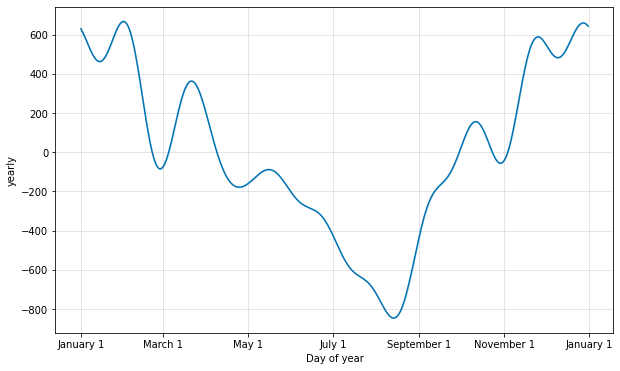

In [17]:
from fbprophet.plot import plot_yearly
plot_yearly(model)

**Question 17 and 18**

In [18]:
 multi_model = power_daily.rename(columns = {'Datetime':'ds','Global_active_power':'y',
                                           'Global_reactive_power':'add1','Voltage':'add2',
                                           'Global_intensity':'add3','Sub_metering_1':'add4',
                                          'Sub_metering_2':'add5','Sub_metering_3':'add6'})
multi_model.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [19]:
# assign train and test data
train2 = multi_model[:-365]
test2 = multi_model[-365:]
print('train shape', train2.shape)
print('test shape', test2.shape)

train shape (1077, 8)
test shape (365, 8)


In [20]:
 #creat multivariate model
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
model2.add_regressor('add4')
model2.add_regressor('add5')
model2.add_regressor('add6')

In [21]:
 
model2.fit(train2)
 
forecast2 = model2.predict(test2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,add2_lower,add2_upper,add3,add3_lower,add3_upper,add4,add4_lower,add4_upper,add5,add5_lower,add5_upper,add6,add6_lower,add6_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1596.426121,1365.422106,1397.787473,1596.426121,1596.426121,7.541574,7.541574,7.541574,0.614069,0.614069,0.614069,-232.325836,-232.325836,-232.325836,2.196835,2.196835,2.196835,0.821706,0.821706,0.821706,3.860963,3.860963,3.860963,-215.231457,-215.231457,-215.231457,-217.290689,-217.290689,-217.290689,-0.112838,-0.112838,-0.112838,2.172070,2.172070,2.172070,0.0,0.0,0.0,1381.194664
1,2009-11-28,1596.556409,1846.013976,1876.758255,1596.556409,1596.556409,-8.886784,-8.886784,-8.886784,0.505234,0.505234,0.505234,263.403386,263.403386,263.403386,-2.022916,-2.022916,-2.022916,0.826962,0.826962,0.826962,7.743796,7.743796,7.743796,265.479235,265.479235,265.479235,261.569679,261.569679,261.569679,1.408596,1.408596,1.408596,2.500960,2.500960,2.500960,0.0,0.0,0.0,1862.035644
2,2009-11-29,1596.686696,1628.174720,1660.796970,1596.686696,1596.686696,-2.797493,-2.797493,-2.797493,1.215510,1.215510,1.215510,47.462898,47.462898,47.462898,0.781457,0.781457,0.781457,-0.578994,-0.578994,-0.578994,-1.461525,-1.461525,-1.461525,47.650995,47.650995,47.650995,44.621854,44.621854,44.621854,0.164156,0.164156,0.164156,2.864986,2.864986,2.864986,0.0,0.0,0.0,1644.337692
3,2009-11-30,1596.816984,1727.818459,1758.033493,1596.816984,1596.816984,3.917803,3.917803,3.917803,1.404493,1.404493,1.404493,131.752113,131.752113,131.752113,0.772224,0.772224,0.772224,0.840102,0.840102,0.840102,4.481991,4.481991,4.481991,146.099282,146.099282,146.099282,143.168725,143.168725,143.168725,-0.338153,-0.338153,-0.338153,3.268710,3.268710,3.268710,0.0,0.0,0.0,1742.916266
4,2009-12-01,1596.947271,1745.954998,1779.633181,1596.947271,1596.947271,5.969075,5.969075,5.969075,0.935274,0.935274,0.935274,150.954235,150.954235,150.954235,2.196835,2.196835,2.196835,0.843781,0.843781,0.843781,2.762874,2.762874,2.762874,165.708177,165.708177,165.708177,163.662074,163.662074,163.662074,-1.669783,-1.669783,-1.669783,3.715886,3.715886,3.715886,0.0,0.0,0.0,1762.655448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2010-11-22,1643.329613,1836.524022,2385.028449,1367.066975,1900.033190,5.883516,5.883516,5.883516,-0.075230,-0.075230,-0.075230,472.006090,472.006090,472.006090,-4.207320,-4.207320,-4.207320,-0.079157,-0.079157,-0.079157,1.796047,1.796047,1.796047,475.788813,475.788813,475.788813,475.323947,475.323947,475.323947,-0.338153,-0.338153,-0.338153,0.803020,0.803020,0.803020,0.0,0.0,0.0,2119.118426
361,2010-11-23,1643.459900,1382.300024,1923.100397,1366.373157,1901.921127,6.757642,6.757642,6.757642,0.081740,0.081740,0.081740,12.394010,12.394010,12.394010,-0.271172,-0.271172,-0.271172,0.789120,0.789120,0.789120,-1.767804,-1.767804,-1.767804,17.352790,17.352790,17.352790,17.983536,17.983536,17.983536,-1.669783,-1.669783,-1.669783,1.039037,1.039037,1.039037,0.0,0.0,0.0,1660.812690
362,2010-11-24,1643.590188,1591.246289,2133.309092,1365.442885,1903.851681,7.647097,7.647097,7.647097,-0.144153,-0.144153,-0.144153,209.704152,209.704152,209.704152,0.751119,0.751119,0.751119,-0.467043,-0.467043,-0.467043,4.743104,4.743104,4.743104,224.616620,224.616620,224.616620,222.234276,222.234276,222.234276,1.101892,1.101892,1.101892,1.280452,1.280452,1.280452,0.0,0.0,0.0,1868.206808
363,2010-11-25,1643.720475,1212.774919,1750.669848,1364.437042,1904.619443,10.558235,10.558235,10.558235,0.480265,0.480265,0.480265,-160.853919,-160.853919,-160.853919,0.777500,0.777500,0.777500,0.


calculate the MAPE

In [23]:
 
#calculating mean absolute percentage error
mape2 = np.mean(np.abs(np.array(test2['y']) -np.array(forecast2['yhat']))/ np.array(test2['y'])) *100
round(mape2,2)

2.83

In [24]:
 
#calculate rmse
from sklearn import metrics 
rmse2 = np.sqrt(metrics.mean_squared_error(np.array(test2['y']),np.array(forecast2['yhat'])))
round(rmse2,2)

41.93

**Question 19**

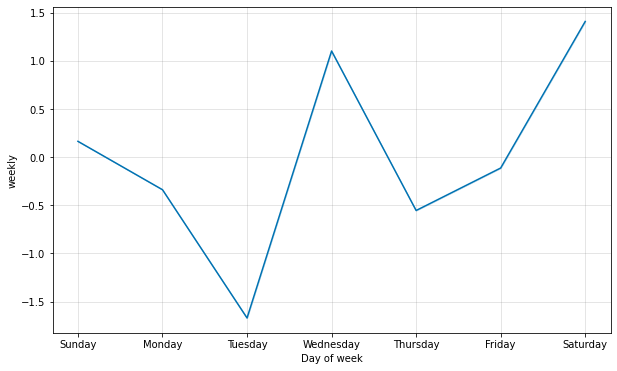

In [25]:
 
# visualize each components (trends, monthly)
from fbprophet.plot import plot_weekly
plot_weekly(model2)

Tuesday has the lowest value